In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

In [13]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)



In [17]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(512, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 12s 45ms/step - loss: 0.6951 - accuracy: 0.0013 - val_loss: 0.6950 - val_accuracy: 8.0000e-04
Epoch 2/10
235/235 [==============================] - 10s 44ms/step - loss: 0.6948 - accuracy: 0.0013 - val_loss: 0.6948 - val_accuracy: 8.0000e-04
Epoch 3/10
235/235 [==============================] - 9s 38ms/step - loss: 0.6946 - accuracy: 0.0013 - val_loss: 0.6945 - val_accuracy: 9.0000e-04
Epoch 4/10
235/235 [==============================] - 10s 44ms/step - loss: 0.6944 - accuracy: 0.0013 - val_loss: 0.6943 - val_accuracy: 9.0000e-04
Epoch 5/10
235/235 [==============================] - 10s 44ms/step - loss: 0.6942 - accuracy: 0.0013 - val_loss: 0.6941 - val_accuracy: 9.0000e-04
Epoch 6/10
235/235 [==============================] - 10s 44ms/step - loss: 0.6940 - accuracy: 0.0013 - val_loss: 0.6939 - val_accuracy: 9.0000e-04
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.6938 - accuracy: 0.0013 - val_loss:

In [19]:
# Make prediction on test data
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


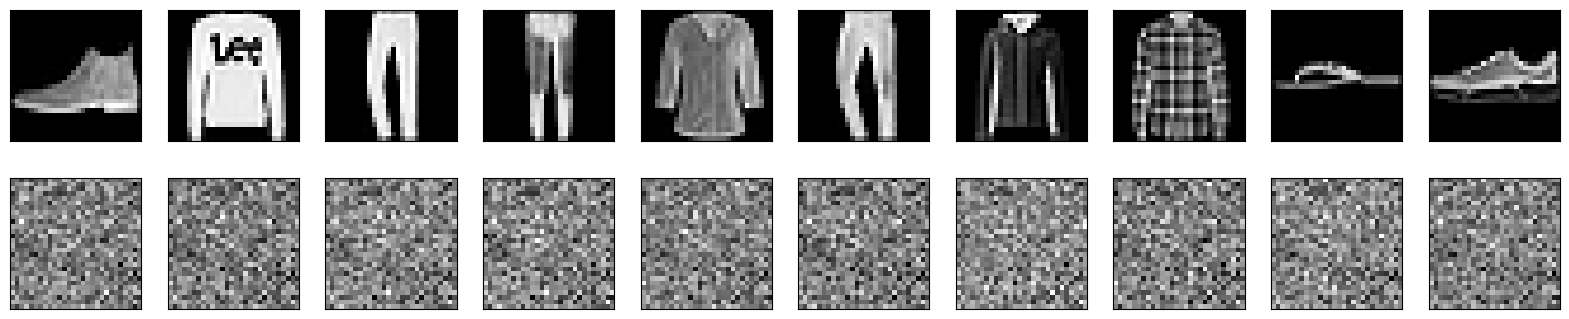

In [20]:
# Visualize a reconstructed version of test data
import matplotlib.pyplot as plt
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



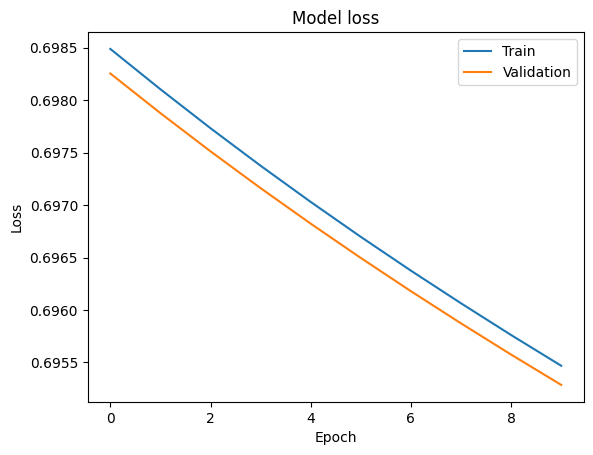

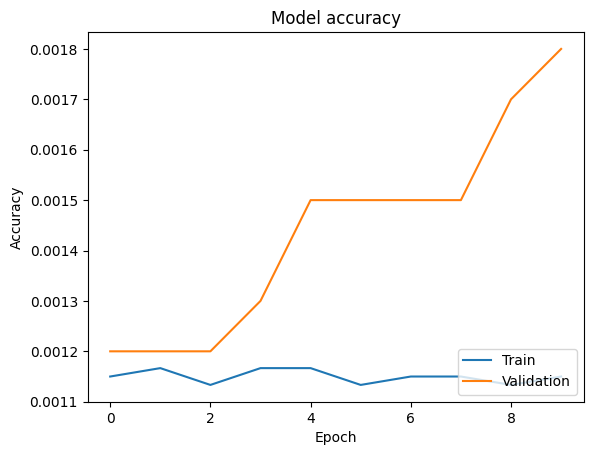

In [9]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()